# CyberForecast - Exploratory Data Analysis
**Obiettivo**: Analizzare e comprendere il dataset Global Cybersecurity Threats 2015-2024

## Domande di ricerca

### **1. Analisi Geografica**
- **Q1**: Quali paesi sono più colpiti dagli attacchi informatici?
  - **KPI**: Top 10 paesi per numero attacchi

- **Q2**: Esistono differenze regionali nei tipi di attacco?
  - **KPI**: Distribuzione Attack Type per continente

- **Q3**: Quali paesi hanno le perdite finanziarie più elevate?
  - **KPI**: Perdite medie e totali per paese

### **2. Analisi Settoriale**

- **Q4**: Quali settori sono più vulnerabili agli attacchi?
  - **KPI**: Frequenza attacchi per Target Industry

- **Q5**: Quali settori subiscono le perdite economiche maggiori?
  - **KPI**: Financial Loss medio per settore

- **Q6**: Esiste correlazione tra settore e tipo di attacco?
  - **KPI**: Matrice settore × tipo attacco

### **3. Analisi Temporale**

- **Q7**: Come è evoluta la frequenza degli attacchi dal 2015 al 2024?
  - **KPI**: Trend annuale numero attacchi

- **Q8**: Quali anni hanno registrato i picchi di attacchi?
  - **KPI**: Anni con crescita >20% rispetto all'anno precedente

- **Q9**: Le perdite finanziarie sono aumentate nel tempo?
  - **KPI**: Trend perdite finanziarie annuali

### **4. Analisi Tipi di Attacco**

- **Q10**: Quali sono i tipi di attacco più frequenti?
  - **KPI**: Top 5 Attack Types per frequenza

- **Q11**: Quali attacchi causano più danni economici?
  - **KPI**: Financial Loss medio per Attack Type

- **Q12**: Quali attacchi impattano più utenti?
  - **KPI**: Affected Users medio per Attack Type

### **5. Analisi Vulnerabilità**

- **Q13**: Quali vulnerabilità sono più sfruttate?
  - **KPI**: Frequenza Security Vulnerability Type

- **Q14**: Esiste correlazione tra vulnerabilità e perdite?
  - **KPI**: Correlazione vulnerabilità × financial loss

- **Q15**: Quali fonti di attacco sono più pericolose?
  - **KPI**: Distribuzione Attack Source

### **6. Analisi Difese**

- **Q16**: Quali meccanismi di difesa sono più utilizzati?
  - **KPI**: Frequenza Defense Mechanism Used

- **Q17**: Esiste correlazione tra difesa e tempo di risoluzione?
  - **KPI**: Resolution Time medio per Defense Mechanism

- **Q18**: Le difese AI-based sono più efficaci?
  - **KPI**: Confronto metriche AI-based vs tradizionali

### **7. Analisi Impatto**

- **Q19**: Qual è la distribuzione delle perdite finanziarie?
  - **KPI**: Percentili perdite (P50, P75, P90, P95)

- **Q20**: Esistono outliers significativi?
  - **KPI**: Attacchi con loss > 90° percentile

- **Q21**: Qual è il tempo medio di risoluzione?
  - **KPI**: Resolution Time medio, mediano, max

In [1]:
#Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Load dataset and display first few rows
df = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')
df.head()

,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


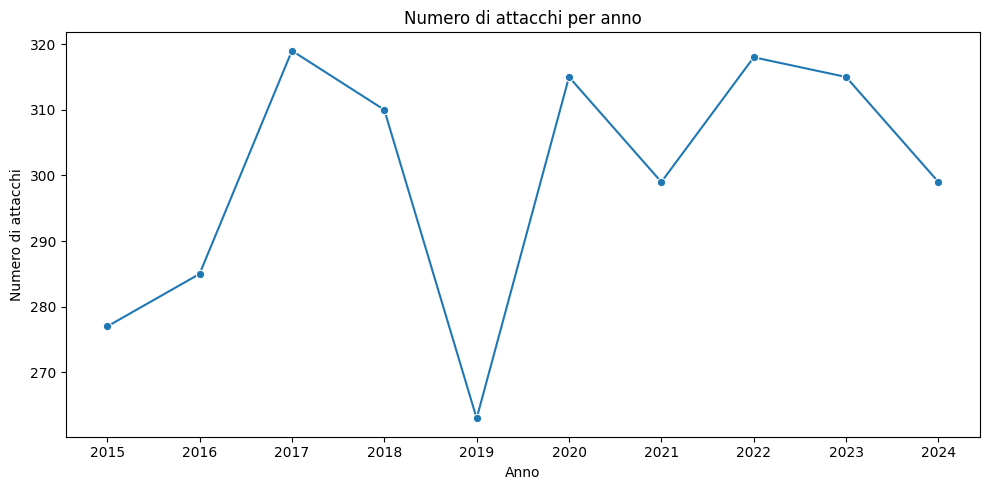

In [4]:
# Plot attacks per anno usando seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carica dataset
# path relativo al notebook: ../data/...
df = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')

# Determina o estrai l'anno
if 'Year' in df.columns:
    df['year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
else:
    # cerca colonne con 'date' o 'incident' nel nome
    date_cols = [c for c in df.columns if 'date' in c.lower() or 'incident' in c.lower()]
    if date_cols:
        col = date_cols[0]
        df[col] = pd.to_datetime(df[col], errors='coerce')
        df['year'] = df[col].dt.year.astype('Int64')
    else:
        # fallback: prova a parsare la prima colonna
        try:
            df.iloc[:,0] = pd.to_datetime(df.iloc[:,0], errors='coerce')
            df['year'] = df.iloc[:,0].dt.year.astype('Int64')
        except Exception:
            df['year'] = pd.NA

# Rimuove anni mancanti e calcola conteggi
counts = df.dropna(subset=['year']).groupby('year').size().reset_index(name='count')
counts = counts.sort_values('year')

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=counts, x='year', y='count', marker='o')
plt.title('Numero di attacchi per anno')
plt.xlabel('Anno')
plt.ylabel('Numero di attacchi')
# Migliora tick degli anni se presenti
if not counts['year'].empty:
    plt.xticks(counts['year'].astype(int))
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

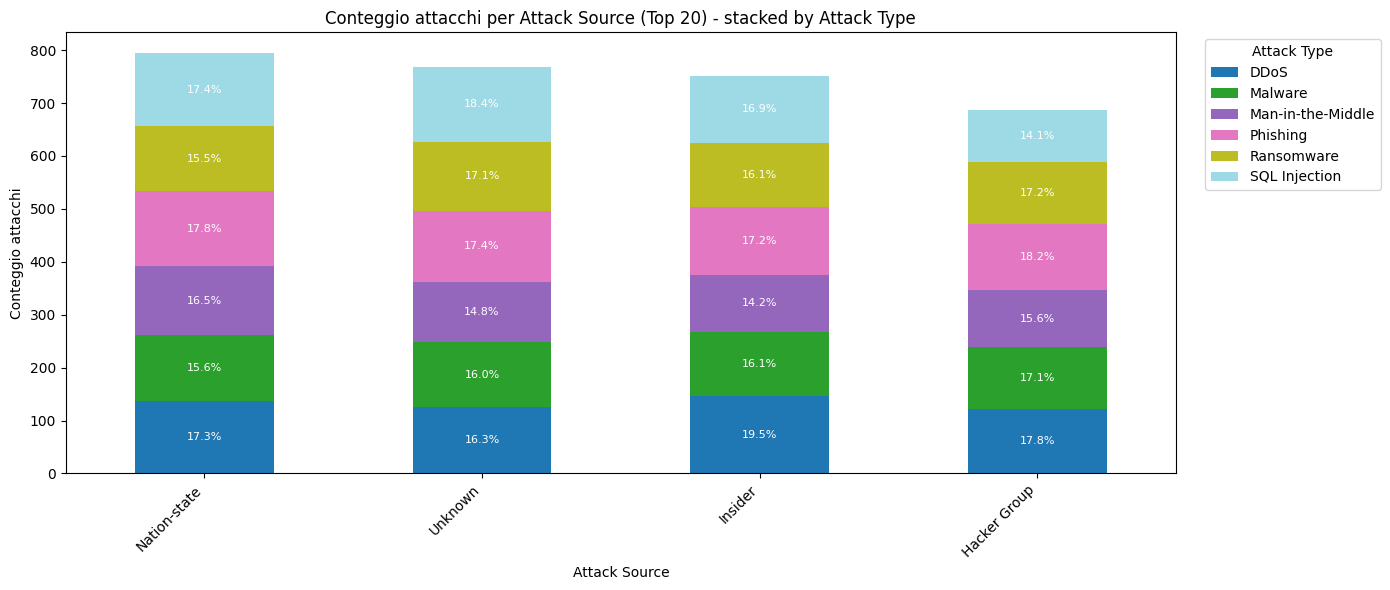

In [ ]:
# Istogramma stacked: una barra per Attack Source divisa per Attack Type
# Con annotazioni percentuali per ciascun segmento
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carica dataset
df = pd.read_csv('../data/Global_Cybersecurity_Threats_2015-2024.csv')

# funzione di supporto per trovare colonne per nome (case-insensitive)
def find_col(df, keywords):
    for c in df.columns:
        low = c.lower()
        for k in keywords:
            if k in low:
                return c
    return None

# prova a trovare le colonne rilevanti
source_col = find_col(df, ['attack source', 'attack_source', 'source', 'attacker', 'attacking'])
type_col = find_col(df, ['attack type', 'attack_type', 'attacktype', 'type'])

if source_col is None:
    print('Impossibile trovare una colonna per "Attack Source" nel dataset. Colonne disponibili:')
    print(list(df.columns))
else:
    # prepara dataframe per il plotting
    plot_df = df[[source_col]].copy()
    plot_df[source_col] = plot_df[source_col].fillna('Unknown').astype(str)

    if type_col is not None:
        plot_df[type_col] = df[type_col].fillna('Unknown').astype(str)

    # Limitare al top N sorgenti per leggibilità (modifica TOP_N se vuoi)
    TOP_N = 20
    top_sources = plot_df[source_col].value_counts().nlargest(TOP_N).index
    plot_df_filtered = plot_df[plot_df[source_col].isin(top_sources)]

    plt.figure(figsize=(14,6))
    if type_col is not None:
        # pivot per avere una riga per source e colonne per attack type (counts)
        pivot = pd.crosstab(plot_df_filtered[source_col], plot_df_filtered[type_col])
        # assicura ordine delle source
        pivot = pivot.reindex(top_sources).fillna(0)
        # plot stacked bar
        ax = pivot.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')

        # calcola totali per riga per normalizzazione e annotazioni
        totals = pivot.sum(axis=1)

        # aggiungi percentuali su ogni segmento
        for i, col in enumerate(pivot.columns):
            cumulative = np.zeros(len(pivot))
            for j in range(i):
                cumulative += pivot.iloc[:, j].values
            heights = pivot[col].values
            for idx, h in enumerate(heights):
                total = totals.iloc[idx]
                if total == 0:
                    continue
                pct = 100.0 * h / total
                if h <= 0:
                    continue
                y = cumulative[idx] + h / 2.0
                # scegli colore del testo in base alla luminosità del segmento
                # ottieni colore del segmento dal colormap
                try:
                    color = ax.patches[0].get_facecolor()
                except Exception:
                    color = (0.0, 0.0, 0.0)
                text_color = 'white' if pct > 6 else 'black'
                ax.text(idx, y, f"{pct:.1f}%", ha='center', va='center', fontsize=8, color=text_color)

        plt.legend(title=type_col, bbox_to_anchor=(1.02, 1), loc='upper left')
    else:
        # fallback: singole barre senza divisione
        counts = plot_df_filtered[source_col].value_counts().reindex(top_sources)
        ax = counts.plot(kind='bar', figsize=(14,6), color='C0')

        # annota conteggi sopra le barre
        for idx, val in enumerate(counts.values):
            ax.text(idx, val + max(counts.values) * 0.01, f"{int(val)}", ha='center', va='bottom', fontsize=9)

    plt.title('Conteggio attacchi per Attack Source (Top {}) - stacked by Attack Type'.format(TOP_N))
    plt.xlabel('Attack Source')
    plt.ylabel('Conteggio attacchi')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

